1️⃣ Importing Libraries:

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2️⃣ Downloading the Dataset from Kaggle:

In [ ]:
# Download latest version
path = kagglehub.dataset_download("xontoloyo/data-penjualan-zara")

print("Path to dataset files:", path)

100%|██████████| 16.8k/16.8k [00:00<00:00, 20.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/xontoloyo/data-penjualan-zara/versions/1


3️⃣ Reading the Data Using Pandas:

In [ ]:
df = pd.read_csv("/content/zara.csv", sep=";")

4️⃣Checking the Data


In [ ]:
# Show the first 5 questions for correct reading
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [ ]:
# To know data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [ ]:
# Get summary statistics
#df.describe()

5️⃣Check Missing Values

In [ ]:
# Number of missing values ​​in each column
df.isnull().sum()

,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
sku,0
name,1


6️⃣ Check for Duplicates


In [ ]:
print(df.duplicated().sum())

0


7️⃣ Data Distribution

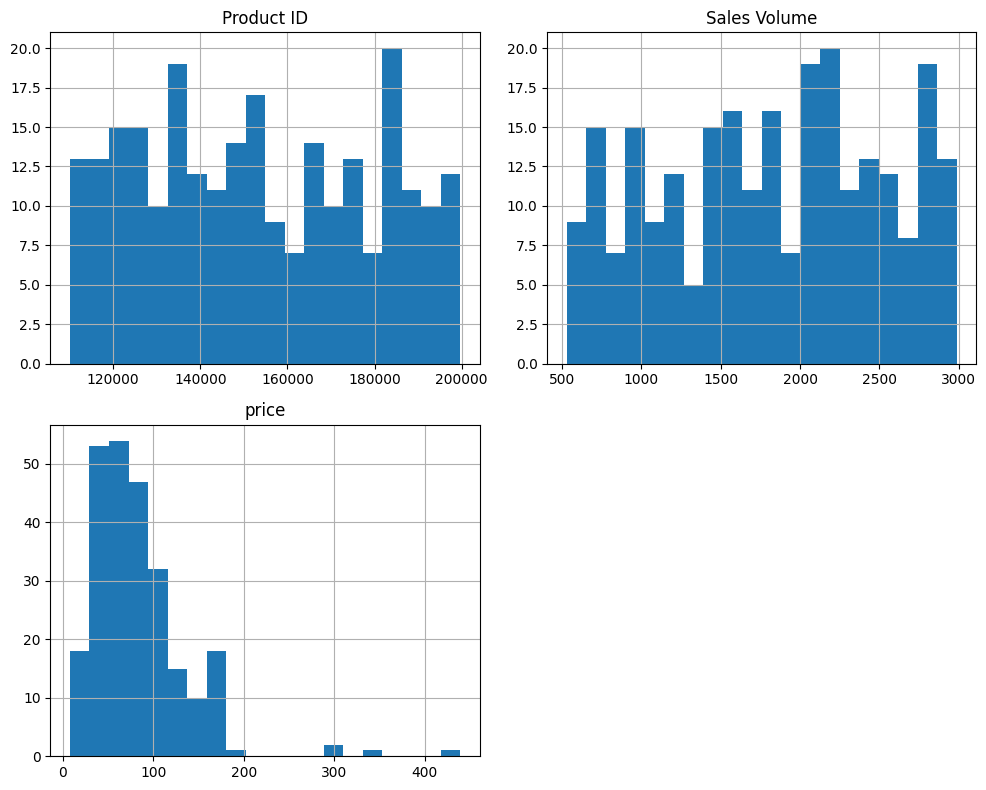

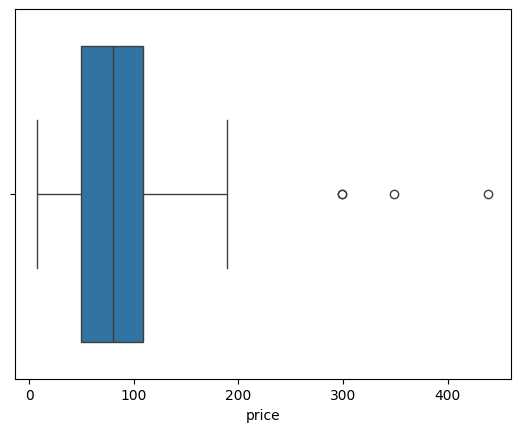

In [ ]:
# Plot histogram for all numeric columns
df.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplot to check for outliers
sns.boxplot(x=df['price'])
plt.show()

8️⃣ Check Correlations


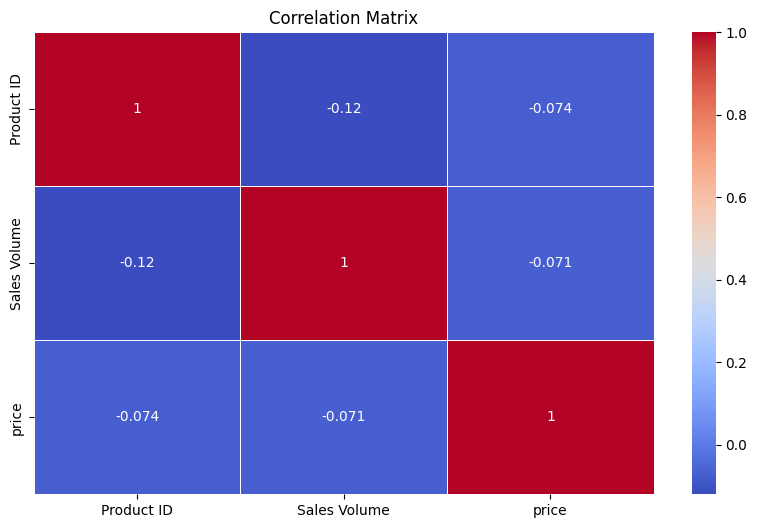

In [ ]:
# Correlation matrix
corr = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

9️⃣ Visualize Categorical Variables

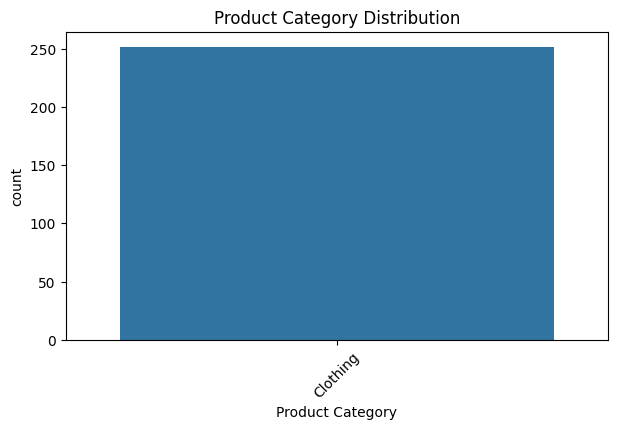

In [ ]:
# Plot categorical variables
plt.figure(figsize=(7, 4))
sns.countplot(x='Product Category', data=df)
plt.xticks(rotation=45)
plt.title('Product Category Distribution')
plt.show()

🔟 Data Cleaning

In [ ]:
# Convert date
df['scraped_at'] = pd.to_datetime(df['scraped_at'], errors='coerce')
# Confirm that the price is no
df['price'] = pd.to_numeric(df['price'], errors='coerce')
# Confirm that the sales volume is No
df['Sales Volume'] = pd.to_numeric(df['Sales Volume'], errors='coerce')

In [ ]:
# Replace missing name with "Unknown"
df['name'] = df['name'].fillna("Unknown")
# Compensate for missing description
df['description'] = df['description'].fillna("No description available")

In [ ]:
# All values ​​must be 0
df.isnull().sum()

,0
Product ID,0
Product Position,0
Promotion,0
Product Category,0
Seasonal,0
Sales Volume,0
brand,0
url,0
sku,0
name,0


8️⃣ Grouping and Aggregation


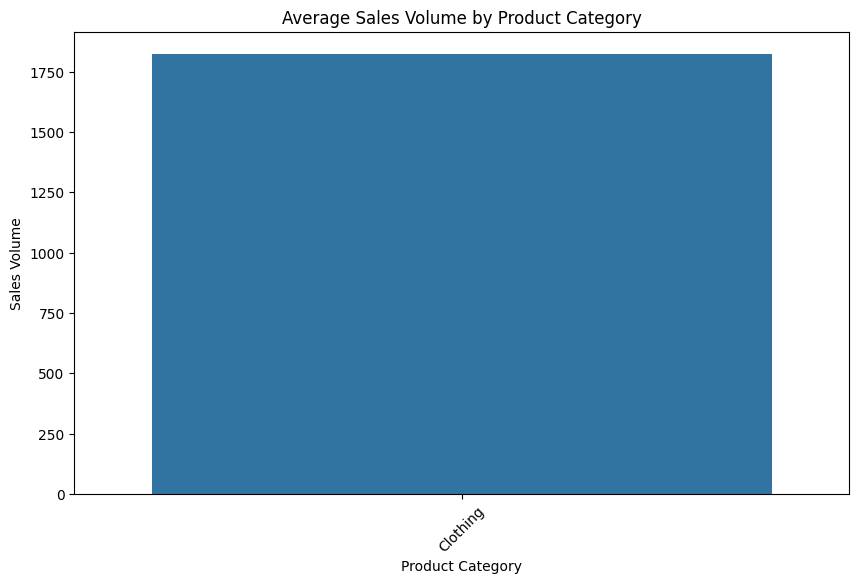

In [ ]:
# Example: Group by 'Product Category' and get the average sales volume
category_sales = df.groupby('Product Category')['Sales Volume'].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Sales Volume', data=category_sales)
plt.xticks(rotation=45)
plt.title('Average Sales Volume by Product Category')
plt.show()

🔟 Feature Engineering

In [ ]:
# Example: Calculate price per unit if such data is available
df['price_per_unit'] = df['price'] / df['Sales Volume']

🔟 Data Visualization


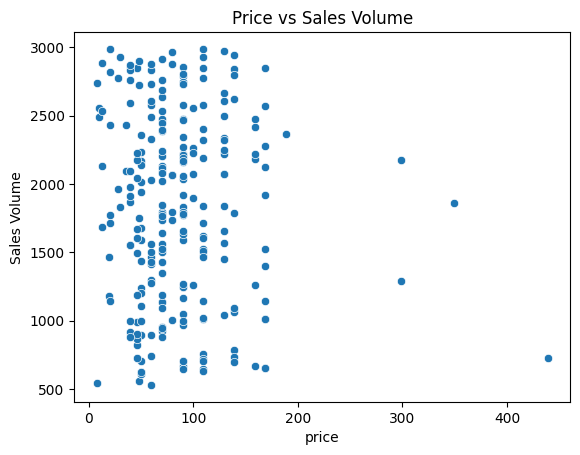

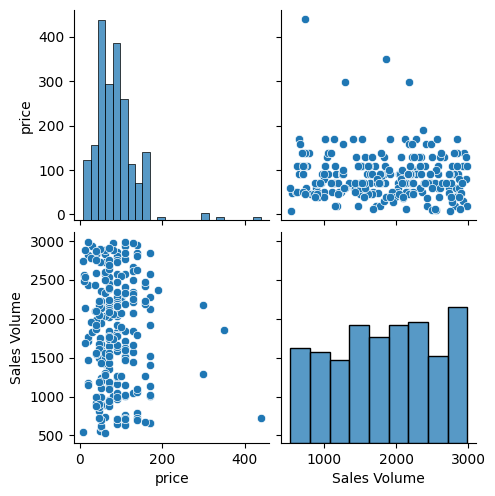

In [ ]:
# Scatter plot between 'price' and 'Sales Volume'
sns.scatterplot(x='price', y='Sales Volume', data=df)
plt.title('Price vs Sales Volume')
plt.show()

# Pairplot to check relationships between multiple columns
sns.pairplot(df[['price', 'Sales Volume', 'description']])
plt.show()